### 전국육교정보데이터
* 제가각 계산시 결측지 있는 샘플은 버림.

- 내진설계된 육교 퍼센트
- 안전등급별 육교갯수, 비율
- 육교가 만들어진 연도 vs 장애인편의시설간 상관관계
    - 연도, 장애인편의시설 갖춘 육교의 갯수/해당연도 건설 육고 갯수

- 길이가 가장 긴 육교(육교연장)
- 가장 튼튼한 육교(허용통행하중)
- 가장 높은 육교(통행제한 높이)

- 육교연장,허용통해하중,통행제한 높이에 대해 최대,최소값,평균,표준편차

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def my_split(s):
    block_start = False
    start_index = 0
    ret_list=[]
    for i, c in enumerate(s):
        if block_start==False:
            if c==',':
                ret_list.append(s[start_index:i])
                start_index=i+1
            elif c=='"':
                block_start=True
                start_index = i
        else:
            if c=='"':
                block_start=False
    if s[-1]!=',':
        ret_list.append(s[start_index:])
    return ret_list

def split_len(data_list):
    len_list=[]
    for e in data_list:
        len_list.append(len(e))
    print(set(len_list))
    if len(set(len_list))>1:
        for i in set(len_list):
            print(i, len_list.count(i))
    return set(len_list)

In [9]:
csv_data = []
with open('전국육교정보표준데이터.csv') as f:
    for line in f:
        csv_data.append(my_split(line[:-1]))
#print(csv_data[:3])
#split_len(csv_data)
for e in enumerate(csv_data[0]):
    print(e)
np_data = np.array(csv_data)
print(np_data.shape)

(0, '육교명')
(1, '도로종류')
(2, '도로노선번호')
(3, '도로노선명')
(4, '소재지도로명주소')
(5, '위도')
(6, '경도')
(7, '육교연장')
(8, '육교높이')
(9, '허용통행하중')
(10, '통행제한높이')
(11, '육교폭')
(12, '난간높이')
(13, '조명개수')
(14, '장애인편의시설설치여부')
(15, '장애인편의시설종류')
(16, '장애인편의시설수량')
(17, '부대시설종류')
(18, '부대시설수량')
(19, '육교준공일자')
(20, '내진설계적용여부')
(21, '안전등급')
(22, '사용제한구분')
(23, '육교보수보강내역')
(24, '최종안전점검유형')
(25, '최종안전점검일자')
(26, '관리기관명')
(27, '데이터기준일자')
(28, '제공기관코드')
(29, '제공기관명')
(1219, 30)


In [24]:
# 내진설계
sub_data = np_data[1:,20]
#print(sub_data[:3])

val,cnt=np.unique(sub_data,return_counts = True)
print(val,count)
print((cnt[1:]*100)/np.sum(cnt[1:]))

filter1 = sub_data!=' '
sub_data_f = sub_data[filter1]
val,cnt = np.unique(sub_data_f,return_counts = True)
print(val,cnt)
print(cnt*100/np.sum(cnt))


[' ' 'N' 'Y'] [357 695 166]
[80.72009292 19.27990708]
['N' 'Y'] [695 166]
[80.72009292 19.27990708]


In [45]:
# 안전등급별 육교 갯수
sub_data = np_data[1:, 21]
filter1 = np_data[:,21] == '불량'
val,cnt = np.unique(sub_data,return_counts = True)
print(val,cnt)
val2 = np.expand_dims(val,1)
cnt2 = cnt[:,np.newaxis]
cnt_percent = cnt*100/np.sum(cnt)
cnt_percent2 = np.expand_dims(cnt_percent,1)
np.concatenate((val2,cnt2,cnt_percent2),1)

np_data[filter1]

['미흡' '보통' '불량' '양호' '우수'] [ 25 390   1 795   7]


array([['갈평 보도육교', '기타', '경부선', '경부선', '경기도 평택시 서정동 432-3',
        '37.05929603', '127.0533613', '50', '', '', '8.5', '2.3', '', '',
        'N', '없음', '', '없음', '', '', 'N', '불량', '사용제한', '', '정밀점검',
        '2020-12-30', '경기도 평택시', '2022-06-13', '3910000', '경기도 평택시']],
      dtype='<U61')

In [67]:
# 육교연장,허용통행하중,통행제한높이: 최소,최대,평균,표준편차
#sub_data = np_data[:,7:11]
print(np_data[0,7:11])
for i in range(7,11):
    print('***',np_data[0,i])
    sub_data = np_data[1:,i]
    filter1 = (sub_data!='') & (sub_data!='0') & (sub_data!='0.0')
    #print(np.unique(sub_data[filter1]))
    sub_data_f = sub_data[filter1].astype(np.float64)
    #print(sub_data_f)
    print('최소',np.min(sub_data_f))
    print('최대',np.max(sub_data_f))
    print('평균',np.mean(sub_data_f))
    print('표준편차',np.std(sub_data_f))
    
filter2 = (np_data[:,8] == '150.0') | (np_data[:,8]=='150')
np_data[filter2]

['육교연장' '육교높이' '허용통행하중' '통행제한높이']
*** 육교연장
최소 5.3
최대 693.6
평균 50.67291845493562
표준편차 40.366545219300704
*** 육교높이
최소 0.6
최대 150.0
평균 9.39847870967742
표준편차 16.43855274916153
*** 허용통행하중
최소 0.34
최대 225.0
평균 7.741186915887851
표준편차 21.923480558452354
*** 통행제한높이
최소 1.4
최대 50.0
평균 4.913341750841751
표준편차 2.3497046582175938


array([['안곡육교', '기타', '', '중산로', '경기도 고양시 일산동구 중산로 147-1', '37.685252',
        '126.7808247', '150', '150', '', '4.5', '4.9', '', '', 'Y',
        '경사로', '1', '없음', '', '2006-05-29', 'N', '양호', '제한없음', '',
        '정기점검', '2022-05-16', '경기도 고양시청', '2022-11-10', '3940000',
        '경기도 고양시']], dtype='<U61')

In [77]:
# 준공연도별과 장애인편의 시설 여부의 상관관계
sub_data = np_data[1:,[14,19]]
#print(sub_data)
#np.unique(sub_data[:,0])
#np.unique(sub_data[:,1]) 결측치 찾기
filter1 = sub_data[:,1]!=''
sub_data = sub_data[filter1]

year_yn = []
for yn,ymd in sub_data:
    yr = ymd.split('-')[0]
    year_yn.append(yr+'-'+yn)
    #print(yn,ymd)
#print(year_yn)
year_yn = np.array(year_yn)
val,cnt = np.unique(year_yn,return_counts=True)
print(val,cnt)

['1968-N' '1970-N' '1970-Y' '1971-N' '1972-N' '1974-Y' '1976-N' '1977-N'
 '1977-Y' '1978-Y' '1980-N' '1980-Y' '1982-N' '1983-N' '1984-N' '1986-Y'
 '1987-N' '1987-Y' '1988-N' '1988-Y' '1989-N' '1989-Y' '1990-N' '1991-N'
 '1991-Y' '1992-N' '1992-Y' '1993-N' '1993-Y' '1994-N' '1994-Y' '1995-N'
 '1995-Y' '1996-N' '1996-Y' '1997-N' '1997-Y' '1998-N' '1998-Y' '1999-N'
 '1999-Y' '2000-N' '2000-Y' '2001-N' '2001-Y' '2002-N' '2002-Y' '2003-N'
 '2003-Y' '2004-N' '2004-Y' '2005-N' '2005-Y' '2006-N' '2006-Y' '2007-N'
 '2007-Y' '2008-N' '2008-Y' '2009-N' '2009-Y' '2010-N' '2010-Y' '2011-N'
 '2011-Y' '2012-N' '2012-Y' '2013-Y' '2014-N' '2014-Y' '2015-N' '2015-Y'
 '2016-N' '2016-Y' '2017-Y' '2018-N' '2018-Y' '2019-Y' '2020-N' '2020-Y'
 '2021-Y' '2022-Y'] [ 1  1  1  2  1  1  1  2  1  1  3  1  2  1  3  8  3  2  4  3  3  4  4  8
  2 28 19 26 21 16 11 16  7 33 17 29 24 29 15 14  9  8 10 13 13  8 14 11
 17  9 17  6 21  7 26  6 18  8 28 16 29 10 18  6 16  8 23  9  6  7  2  9
  4 15  4  3  7  3  1  5  1  3]

- 방법  
### pass1
{
    year: [y,n,....]
}
### pass2
[
    [year,y_count,ratio]
]

In [89]:
sub_data = np_data[1:,[14,19]]
filter1 = sub_data[:,1]!=''
sub_data = sub_data[filter1]

pass1 = dict()
for yn,ymd in sub_data:
    yr = ymd.split('-')[0]
    if yr in pass1.keys():
        pass1[yr].append(yn)
    else:
        pass1[yr] = [yn]
        
#print(pass1)

pass2 = []
for yr in pass1:      #dict 순환시 key값으로 순환이 된다.
    val, cnt = np.unique(pass1[yr],return_counts=True)
    y, ratio = 0, 0
    if 'Y' in val:
        y = cnt[val == 'Y']
    ratio = y*100/np.sum(cnt)
    pass2.append((int(yr),int(y),float(ratio)))
#print(pass2)
np.set_printoptions(precision=3,suppress=True)#numpy 소수점 제거
pass3 = sorted(pass2,key=lambda x : x[0])
pass3 = np.array(pass3)
print(pass3)

[[1968.       0.       0.   ]
 [1970.       1.      50.   ]
 [1971.       0.       0.   ]
 [1972.       0.       0.   ]
 [1974.       1.     100.   ]
 [1976.       0.       0.   ]
 [1977.       1.      33.333]
 [1978.       1.     100.   ]
 [1980.       1.      25.   ]
 [1982.       0.       0.   ]
 [1983.       0.       0.   ]
 [1984.       0.       0.   ]
 [1986.       8.     100.   ]
 [1987.       2.      40.   ]
 [1988.       3.      42.857]
 [1989.       4.      57.143]
 [1990.       0.       0.   ]
 [1991.       2.      20.   ]
 [1992.      19.      40.426]
 [1993.      21.      44.681]
 [1994.      11.      40.741]
 [1995.       7.      30.435]
 [1996.      17.      34.   ]
 [1997.      24.      45.283]
 [1998.      15.      34.091]
 [1999.       9.      39.13 ]
 [2000.      10.      55.556]
 [2001.      13.      50.   ]
 [2002.      14.      63.636]
 [2003.      17.      60.714]
 [2004.      17.      65.385]
 [2005.      21.      77.778]
 [2006.      26.      78.788]
 [2007.   

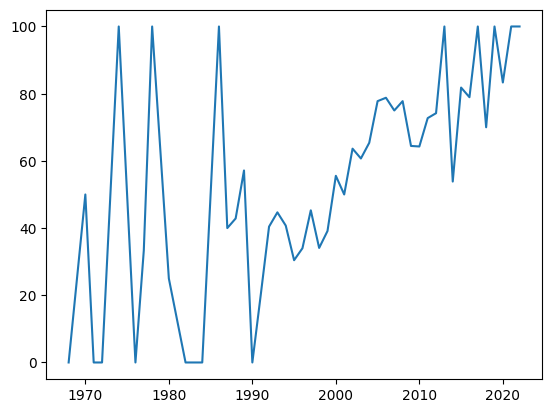

In [91]:
_,axe = plt.subplots()
axe.plot(pass3[:,0],pass3[:,2])

In [95]:
#print(pass3)
filter1 = pass3[:,0]>=1990
pass4 = pass3[filter1]
print(pass4)
print(np.corrcoef(pass4[:,0],pass4[:,2]))

[[1990.       0.       0.   ]
 [1991.       2.      20.   ]
 [1992.      19.      40.426]
 [1993.      21.      44.681]
 [1994.      11.      40.741]
 [1995.       7.      30.435]
 [1996.      17.      34.   ]
 [1997.      24.      45.283]
 [1998.      15.      34.091]
 [1999.       9.      39.13 ]
 [2000.      10.      55.556]
 [2001.      13.      50.   ]
 [2002.      14.      63.636]
 [2003.      17.      60.714]
 [2004.      17.      65.385]
 [2005.      21.      77.778]
 [2006.      26.      78.788]
 [2007.      18.      75.   ]
 [2008.      28.      77.778]
 [2009.      29.      64.444]
 [2010.      18.      64.286]
 [2011.      16.      72.727]
 [2012.      23.      74.194]
 [2013.       9.     100.   ]
 [2014.       7.      53.846]
 [2015.       9.      81.818]
 [2016.      15.      78.947]
 [2017.       4.     100.   ]
 [2018.       7.      70.   ]
 [2019.       3.     100.   ]
 [2020.       5.      83.333]
 [2021.       1.     100.   ]
 [2022.       3.     100.   ]]
[[1.    0

*** 육교연장
중앙값: 39.6
quantile: [30.  39.6 56. ]
iqr: 26.0
upper: 95.0
lower: -9.0


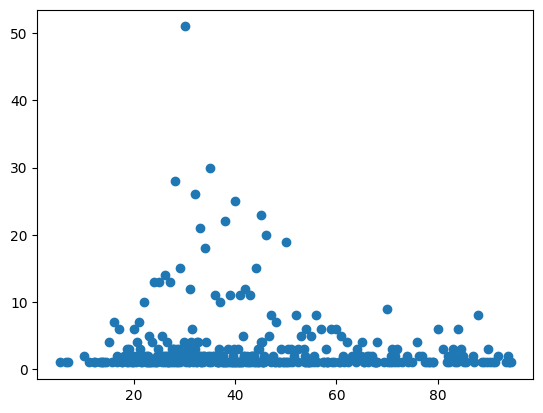

In [110]:
# iqr, outliers(이상치)
#이상치 -> 값이 있지만 값이 이상한 것
i = 7
print('***',np_data[0,i])
sub_data = np_data[1:,i]
filter1 = (sub_data!='') & (sub_data!='0') & (sub_data!='0.0') # 결측치 제거
#print(np.unique(sub_data[filter1]))
sub_data_f = sub_data[filter1].astype(np.float64)

#print(sub_data_f)
# print('최소',np.min(sub_data_f))
# print('최대',np.max(sub_data_f))
# print('평균',np.mean(sub_data_f))
# print('표준편차',np.std(sub_data_f))
print('중앙값:',np.median(sub_data_f))
print('quantile:',np.quantile(sub_data_f,[.25,.5,.75]))
q25,q50,q75 = np.quantile(sub_data_f,[.25,.5,.75])
iqr = q75 - q25
print('iqr:',iqr)
print('upper:',q75+1.5*iqr) # 95.0
print('lower:',q25-1.5*iqr) # -9.0





'''
------------------q25-------------------q50------------------q75-------------------
q25-1.5*iqr(하한선)                                               q75+1.5*iqr(상한선)

'''

upper = q75+1.5*iqr
sub_data_cut = sub_data_f[sub_data_f<upper]
val, cnt = np.unique(sub_data_cut,return_counts = True) # 육교연장 값의 분포

_, axe = plt.subplots()
axe.scatter(val,cnt)

[  3   9  30  64 100 189 124 103 118  57  62  35  31  23  31  12  17  23
  18  11] [ 5.3   9.76 14.22 18.68 23.14 27.6  32.06 36.52 40.98 45.44 49.9  54.36
 58.82 63.28 67.74 72.2  76.66 81.12 85.58 90.04 94.5 ]


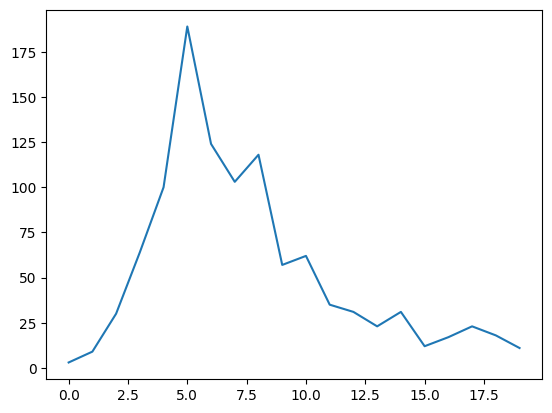

In [116]:
upper = q75+1.5*iqr
sub_data_cut = sub_data_f[sub_data_f<upper]

h_cnt, h_bins = np.histogram(sub_data_cut,bins = 20) #float형을 칸으로 구분해서 리턴하는 함수.
print(h_cnt,h_bins)

val, cnt = np.unique(sub_data_cut,return_counts = True) # 육교연장 값의 분포

_, axe = plt.subplots()
#axe.scatter(val,cnt)
axe.plot(np.arange(20),h_cnt)

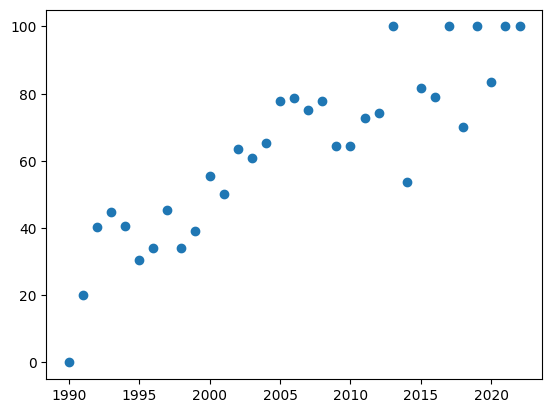

In [117]:
_, axe = plt.subplots()
axe.scatter(pass4[:,0],pass4[:,2])